# Exercise 4.3: Independent Component Analysis in Practice


In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA

## Blind Source Separation using FastICA

Imagine the following situation: there are three singers in a sound studio. Each of the singers ("sound source") generates a sound wave $s_{i}(t)$ over time $t$. The singers are surrounded by three microphones while each of those are recording the arriving sound $x_{j}(t)$. Given the observations of the three microphones $x_{j}(t), j=\{1,2,3\}$, we now want to compute a reconstruction of the contribution of each singer $s_{i,rec}(t)$ using an ICA model.

__Note:__ In the following code, the true sources $S_{true}$ as well as the mixing matrix $A$ are given to generate the observations $X$. In a real world scenario, this would of course not be the case. Instead, you want to reconstruct the independent sources $S_{rec}$ and the mixing matrix $\hat A$.

__Tasks:__
1. Inspect the given generative model for constructing a data set of the above described scenario and train a FastICA model in order to reconstruct $s_{i,rec}(t)$ of each singer. Therefore, you can use the FastICA implementation of the scikit-learn toolbox. 
2. Visualize the observations $x_{j}(t)$ of every microphone, the reconstructed source signals $s_{i,rec}(t)$ and the true sources for all three components $s_{i,true}(t)$. Therefore, use the function 'visualize_data()' as you need to do such kind of plots a few times within this exercise.
3. Plot histograms of the estimated sources. 

In [42]:
def visualize_data(models, names):
    '''plot figure with subplot for each specified model, 
    in each subplot all three components are shown
    Input: list 'models', 'names' 
           (e.g. models = [X, S_true] and names =['observations X', 'true sources'])'''
    
    colors = ['red', 'skyblue', 'orange']
    
    plt.figure(figsize=(12,8))
    for ii, (model, name) in enumerate(zip(models, names), 1):
        plt.subplot(len(names), 1, ii)
        plt.title(name,fontsize=15)
        for sig, color in zip(model.T, colors):
            plt.plot(sig, color=color)
        
    plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
    plt.show()

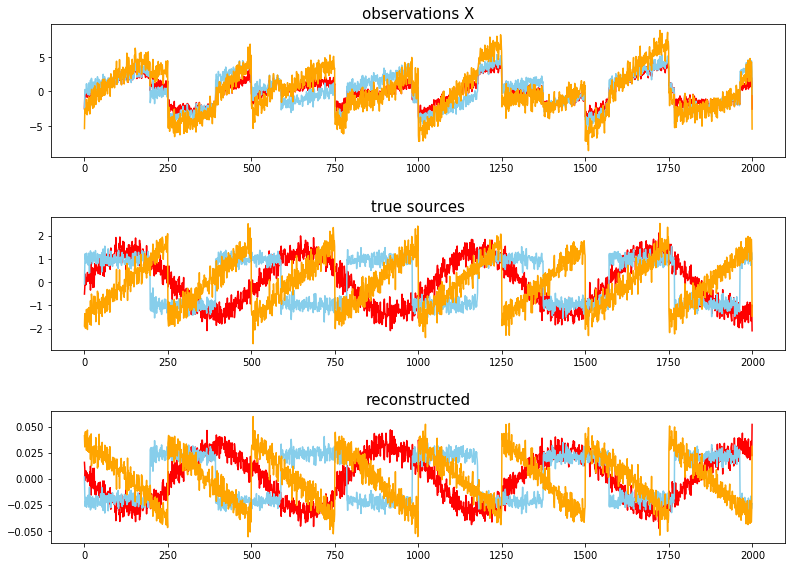

In [43]:
# Generate sample data
np.random.seed(35)
N_samples = 2000
time = np.linspace(0, 8, N_samples)

# Singer 1 : sinusoidal signal
s1 = np.sin(3 * time)  
# Singer 2 : square signal
s2 = np.sign(np.sin(4 * time))
# Singer 3: saw tooth signal
s3 = signal.sawtooth(2 * np.pi * time)  

# concatenate the true single sources and add noise 
S_true = np.c_[s1, s2, s3]
S_true += 0.2 * np.random.normal(size=S_true.shape)  

# standardize the data
S_true /= S_true.std(axis=0) 

# Mix data
A = np.array([[1, 1, 1], [0.3, 2, 1.2], [1.5, 1.2, 2.4]])  # Mixing matrix
X = np.dot(S_true, A.T)

# Task (1): Compute ICA with three components and reconstruct signals from the observations
transformer = FastICA(n_components=3, random_state=0)
X_rec = transformer.fit_transform(X)
X_rec.shape, X.shape

# Task (2): Plot the observations X, the true source S_true and the reconstructed sources S_rec
models = [X, S_true, X_rec]
names = ['observations X', 'true sources', 'reconstructed']
visualize_data(models, names)


#### Q4.3.1) Compare the time series of the reconstructed sources with the true sources in terms of their order and sign. What do you observe?


(array([ 3.,  3.,  1.,  2.,  5., 13., 19., 24., 33., 43., 58., 47., 54.,
        54., 59., 58., 60., 62., 71., 61., 71., 61., 58., 62., 56., 63.,
        67., 67., 65., 73., 61., 58., 52., 66., 64., 62., 66., 49., 43.,
        31., 22., 21., 14.,  8.,  3.,  2.,  3.,  1.,  0.,  1.]),
 array([-0.05582271, -0.05351553, -0.05120834, -0.04890116, -0.04659397,
        -0.04428679, -0.0419796 , -0.03967242, -0.03736523, -0.03505805,
        -0.03275086, -0.03044368, -0.02813649, -0.02582931, -0.02352212,
        -0.02121494, -0.01890775, -0.01660057, -0.01429338, -0.0119862 ,
        -0.00967901, -0.00737183, -0.00506464, -0.00275746, -0.00045027,
         0.00185691,  0.0041641 ,  0.00647128,  0.00877847,  0.01108565,
         0.01339284,  0.01570002,  0.01800721,  0.02031439,  0.02262157,
         0.02492876,  0.02723594,  0.02954313,  0.03185031,  0.0341575 ,
         0.03646468,  0.03877187,  0.04107905,  0.04338624,  0.04569342,
         0.04800061,  0.05030779,  0.05261498,  0.05492216,

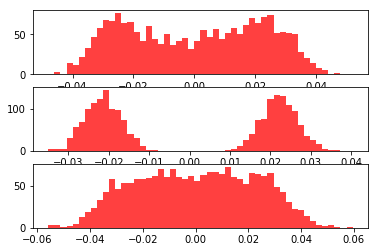

In [44]:
# Task (3): Visualize the histogram of all three estimated independent components
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

# component1 
ax1.hist(X_rec[:, 0], facecolor='r', alpha=0.75, bins=50)

# component2 
ax2.hist(X_rec[:, 1], facecolor='r', alpha=0.75, bins=50)

# component3 
ax3.hist(X_rec[:, 2], facecolor='r', alpha=0.75, bins=50)


#### Q4.3.2) Verify the distribution of the estimated independent components. Which types of distributions do you expect the ICA to return?


## Influence of data shuffling 

Now, we assume that the time information $t$ of the studio recording gets lost and verify the influence upon the ICA model.  

__Tasks:__ 
1. Generate a time-shuffled version of the observations $X_{shuffled}$. __Hint:__ You can use the `np.random.permutation()` function to generate a permutation of timesteps $\{1, 2, ..., T\}$, which can be used to rearrange your dataset along one axis.
2. Compute an ICA model on the modified recordings $X_{shuffled}$ and un-shuffle the reconstructed independent sources $S_{rec,shuffled}$ such that it has the same temporal order as $S_{true}$. __Hint:__ You can use the `np.argsort()` function to invert the permutation you generated before.
3. Use the 'visualize_data()' function to plot the reconstructed, unshuffled ICA-sources $S_{rec}$ and the true sources $S_{true}$.

In [69]:
length = 10
fu = np.linspace(1, 10, num=length)
index_shuff = np.random.permutation(length)
fu_shuff = fu[index_shuff]
index_rev = np.argsort(index_shuff)
fu_rev = fu_shuff[index_rev]
fu_rev == fu

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

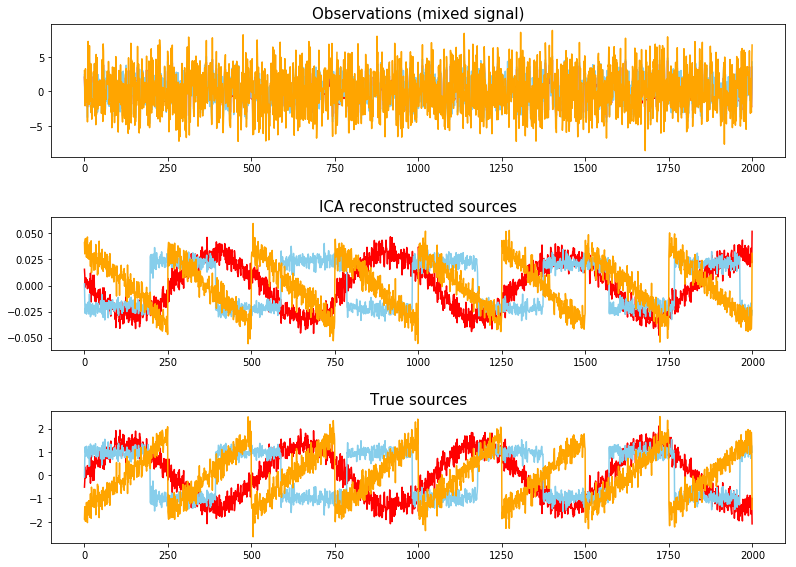

In [71]:
# Task (1): Randomly shuffle X
rand_order = np.random.permutation(N_samples)
rand_order_reverse = np.argsort(rand_order)
X_shuffled = np.dot(S_true, A.T)[rand_order] 

# Task (2): Re-Train ICA model on X_shuffled and un-shuffle the reconstructed sources 
S_rec_shuffled = transformer.fit_transform(X_shuffled)
S_rec_reshuf = S_rec_shuffled[rand_order_reverse]

# Task (3): Visualize the different signals
models = [X_shuffled, S_rec_reshuf, S_true]
names = ['Observations (mixed signal)',
         'ICA reconstructed sources',
         'True sources']

visualize_data(models,names)

#### Q4.3.3) Compare the reconstructed ICA-sources for the shuffled data and the non-shuffled data - can you give a reason for your observation?


## Remove ICA component from your observations

Now, we want to remove the contribution of two singers from the studio recordings $X$ such that only the contribution of singer 1 (sinusoidal waveform) remains. Therefore, you need to do the following steps:

__Tasks:__
1. Take the unmixing matrix $W=\hat A^{-1}$ of the component/s you want to keep and project the observation data $X$ to the  source space $S_{rec}$
2. Use the estimated mixing matrix $\hat A$ of the component/s you want to keep and project the reconstructed sources $S_{rec}$ back to the observation space $X_{clean}$. 
3. Visualize the cleaned observations $X_{clean}$, the original observations $X$ as well as the reconstructed sources $S_{rec}$.

__Hint:__ When selecting the components you want to remove from the observations, it might help to iteratively look at the cleaned observations $X_{clean}$ in order to see the effect.

In [87]:
fu = np.random.uniform(size=(3,3))
fu_slice = fu[:, 0]
fu_slice.shape

(3,)

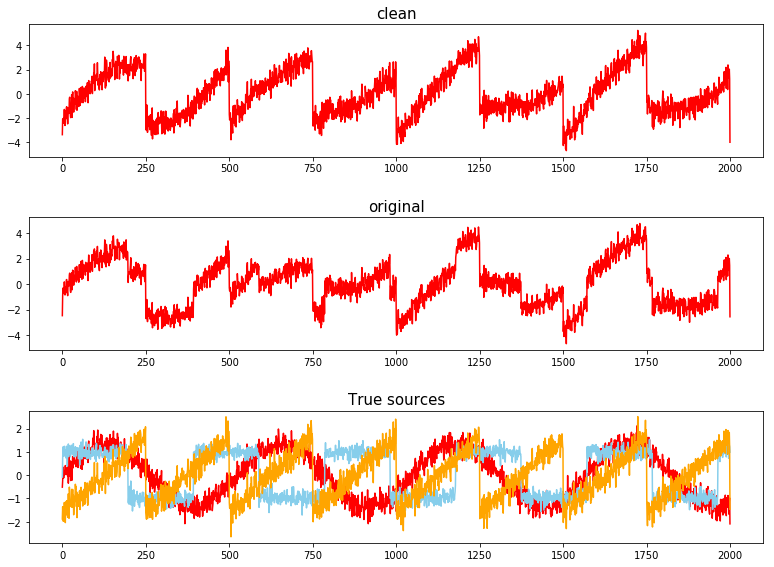

In [89]:
# Task (1): Project data of selected components to the source space, using the unmixing matrix
W = np.linalg.pinv(A)
S_cap = np.matmul(X, W.T)

# Task (2): Project reconstructed ICA sources to the original space by mixing matrix 
X_clean = np.matmul(S_cap, A[:, 0:1])

# Task (3): Visusalize the time series data
models = [X_clean, X[:, 0:1], S_cap]
names = ['clean',
         'original',
         'True sources']

visualize_data(models,names)

#### Q4.3.4) Revisit the 'ML design cycle' referred to in the lecture. To which block would you assign the removal of an ICA component? 

